In [2]:
import urllib.request

In [4]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
response = urllib.request.urlopen(url)
data = response.read()

In [5]:
file = open("airports_db.dat", "wb")
file.write(data)
file.close()

In [7]:
import csv

f = open("airports_db.dat", encoding = "utf8")
airport_db = [] #main arrar for airport
errors = 0
for airport in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        #each slots containing information about an airport
        current_record.append(int(airport[0])) #airport ID
        current_record.append(airport[1]) 
        current_record.append(airport[2])
        current_record.append(airport[3])
        current_record.append(airport[4])
        current_record.append(airport[5])
        current_record.append(float(airport[6]))
        current_record.append(float(airport[7]))
        current_record.append(float(airport[8]))
        current_record.append(float(airport[9]))
        current_record.append(airport[10])
        current_record.append(airport[11])
        current_record.append(airport[12])
        current_record.append(airport[13])
    except : 
        errors += 1
    else:
        airport_db.append(current_record)
print("Total Airport Imported : ", len(airport_db), "# of Errors : ", errors)

Total Airport Imported :  7345 # of Errors :  353


In [8]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
response= ""
data = ""
response = urllib.request.urlopen(url)
data = response.read()

file = open("routes_db.dat", "wb")
file.write(data)
file.close()

In [9]:
f = open("routes_db.dat", encoding = "utf8")
route_db = []
errors = 0
for route in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        current_record.append(route[0]) 
        current_record.append(int(route[1]))
        current_record.append(int(route[3]))
        current_record.append(int(route[5]))
        current_record.append(int(route[7]))
        current_record.append(route[8])
  
    except : 
        errors += 1
    else:
        route_db.append(current_record)
print("Total Routes Imported : ", len(route_db), "# of Errors : ", errors)

Total Routes Imported :  66765 # of Errors :  898


In [10]:
import networkx as nx
network = nx.Graph()

In [11]:
for airport in airport_db:
    network.add_node(airport[0], id=airport[0], name=airport[1], city=airport[2], country=airport[3], iata=airport[4], 
                     icao=airport[5],
                     lat=airport[6], 
                     long=airport[7], alt=airport[8], offset=airport[9], 
                     daylight=airport[10], timezone=airport[11], type=airport[12], source=airport[13])

In [12]:
for route in route_db:
    if route[2] in network.nodes() and route[3] in network.nodes:
        network.add_edge(route[2], route[3], airline = route[0], airline_id = route[1], stops = route[4], equipment = route[5])

In [13]:
network.nodes[507]

{'id': 507,
 'name': 'London Heathrow Airport',
 'city': 'London',
 'country': 'United Kingdom',
 'iata': 'LHR',
 'icao': 'EGLL',
 'lat': 51.4706,
 'long': -0.461941,
 'alt': 83.0,
 'offset': 0.0,
 'daylight': 'E',
 'timezone': 'Europe/London',
 'type': 'airport',
 'source': 'OurAirports'}

In [16]:
network.edges[507, 3093]

{'airline': 'VS', 'airline_id': 5347, 'stops': 0, 'equipment': '333'}

In [17]:
network.nodes[3093]

{'id': 3093,
 'name': 'Indira Gandhi International Airport',
 'city': 'Delhi',
 'country': 'India',
 'iata': 'DEL',
 'icao': 'VIDP',
 'lat': 28.5665,
 'long': 77.103104,
 'alt': 777.0,
 'offset': 5.5,
 'daylight': 'N',
 'timezone': 'Asia/Calcutta',
 'type': 'airport',
 'source': 'OurAirports'}

In [18]:
for i in list(network.neighbors(507)):
    print(network.nodes[i]['id'], " -  ", network.nodes[i]["name"])

344  -   Cologne Bonn Airport
342  -   Hamburg Airport
350  -   Stuttgart Airport
351  -   Berlin-Tegel Airport
2997  -   Chhatrapati Shivaji International Airport
3093  -   Indira Gandhi International Airport
3941  -   Eleftherios Venizelos International Airport
532  -   Aberdeen Dyce Airport
248  -   Kotoka International Airport
1230  -   Málaga Airport
580  -   Amsterdam Airport Schiphol
737  -   Stockholm-Arlanda Airport
3682  -   Hartsfield Jackson Atlanta International Airport
2179  -   Abu Dhabi International Airport
3673  -   Austin Bergstrom International Airport
2057  -   Bahrain International Airport
1218  -   Barcelona International Airport
636  -   Bergen Airport Flesland
467  -   George Best Belfast City Airport
1538  -   Bologna Guglielmo Marconi Airport
3131  -   Kempegowda International Airport
3448  -   General Edward Lawrence Logan International Airport
302  -   Brussels Airport
1423  -   EuroAirport Basel-Mulhouse-Freiburg Airport
1489  -   Budapest Liszt Ferenc Int

In [19]:
nx.info(network, 507)

'Node 507 has the following properties:\nDegree: 171\nNeighbors: 344 342 350 351 2997 3093 3941 532 248 1230 580 737 3682 2179 3673 2057 1218 636 467 1538 3131 3448 302 1423 1489 3849 1382 3876 609 797 3751 3670 599 345 2188 1187 535 3494 1555 340 1738 534 687 1665 352 421 3714 3550 1701 3797 813 3304 2176 3877 3484 517 1197 1529 1638 629 1335 3144 478 3576 1353 346 1524 4059 1354 521 3830 644 1657 3752 3462 1587 1562 3626 591 3731 3577 3469 1194 666 1273 1551 1613 679 146 156 178 193 1208 1678 1386 49 73 100 189 3645 3858 210 1824 1074 1080 260 2908 2170 2177 3885 1128 3395 4029 3988 1626 1059 2560 2564 2922 3077 2359 1225 3930 2072 1468 1479 2939 951 2948 273 1229 1953 2279 1636 3364 3998 3406 2082 3316 1157 1590 3076 3074 8076 3370 596 603 1107 1739 16 2983 1216 1220 4330 2910 1606 893 1132 1205 1206 2223 2206 2207 2397 11051 2985 2976 287 3024 2988 2194'

In [20]:
nx.density(network)

0.0006925627826200445

In [21]:
nx.is_connected(network)

False

In [24]:
degree_centrality = nx.degree_centrality(network)
degree_centrality

{1: 0.0005446623093681918,
 2: 0.0009531590413943356,
 3: 0.0012254901960784316,
 4: 0.0012254901960784316,
 5: 0.004357298474945534,
 6: 0.0005446623093681918,
 7: 0.0006808278867102397,
 8: 0.0010893246187363835,
 9: 0.0009531590413943356,
 10: 0.00013616557734204794,
 11: 0.00013616557734204794,
 12: 0.00013616557734204794,
 13: 0.0,
 14: 0.0,
 15: 0.00013616557734204794,
 16: 0.00462962962962963,
 17: 0.0,
 18: 0.0005446623093681918,
 19: 0.0,
 20: 0.0,
 21: 0.0005446623093681918,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.00040849673202614386,
 28: 0.00013616557734204794,
 29: 0.0005446623093681918,
 30: 0.00040849673202614386,
 31: 0.00013616557734204794,
 32: 0.0005446623093681918,
 33: 0.0002723311546840959,
 34: 0.0002723311546840959,
 35: 0.0,
 36: 0.0,
 37: 0.00040849673202614386,
 38: 0.0,
 39: 0.0,
 40: 0.0002723311546840959,
 41: 0.0005446623093681918,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0005446623093681918,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.004765795206

In [23]:
for airport, centrality_value in degree_centrality.items():
    network.nodes[airport]['degree_centrality'] = centrality_value

network.nodes[507]['degree_centrality']

0.023284313725490197

In [25]:
nx.has_path(network, source= 507, target = 20)

False

In [26]:
nx.has_path(network, source= 507, target = 3093)

True

In [27]:
network.degree()

DegreeView({1: 4, 2: 7, 3: 9, 4: 9, 5: 32, 6: 4, 7: 5, 8: 8, 9: 7, 10: 1, 11: 1, 12: 1, 13: 0, 14: 0, 15: 1, 16: 34, 17: 0, 18: 4, 19: 0, 20: 0, 21: 4, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 3, 28: 1, 29: 4, 30: 3, 31: 1, 32: 4, 33: 2, 34: 2, 35: 0, 36: 0, 37: 3, 38: 0, 39: 0, 40: 2, 41: 4, 42: 0, 43: 0, 44: 0, 45: 4, 46: 0, 47: 0, 48: 0, 49: 35, 50: 3, 51: 0, 52: 0, 53: 0, 54: 2, 55: 10, 56: 4, 57: 0, 58: 3, 59: 0, 60: 1, 61: 1, 62: 0, 63: 2, 64: 0, 65: 1, 66: 0, 67: 4, 68: 1, 69: 3, 70: 4, 71: 0, 72: 3, 73: 32, 74: 0, 75: 2, 76: 0, 77: 0, 78: 2, 79: 2, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 10, 88: 0, 89: 0, 90: 7, 91: 0, 92: 0, 93: 0, 94: 3, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 26, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 2, 107: 0, 108: 1, 109: 2, 110: 0, 111: 13, 112: 3, 113: 3, 114: 0, 115: 3, 116: 1, 117: 7, 119: 4, 120: 9, 121: 10, 122: 2, 123: 0, 124: 0, 125: 3, 126: 2, 127: 2, 128: 2, 129: 0, 130: 0, 131: 0, 132: 11, 133: 6, 134: 0, 135: 3, 136: 4, 137: 0

In [28]:
for airport, degree in list(network.degree()):
    if degree == 0:
        network.remove_node(airport)

In [29]:
nx.info(network)

'Name: \nType: Graph\nNumber of nodes: 3136\nNumber of edges: 18679\nAverage degree:  11.9126'

In [30]:
nx.is_connected(network)

False

In [31]:
nx.number_connected_components(network)

7

In [32]:
[len(e) for e in nx.connected_components(network)]

[3110, 10, 4, 4, 2, 2, 4]

In [33]:
main_subgraph = max(nx.connected_components(network), key= len)
network_main = network.subgraph(main_subgraph)
nx.info(network_main)

'Name: \nType: Graph\nNumber of nodes: 3110\nNumber of edges: 18654\nAverage degree:  11.9961'

In [34]:
nx.is_connected(network_main)

True

In [35]:
import matplotlib.pyplot as plt

In [37]:
for airport in network_main.nodes():
    network_main.nodes[airport]['coordinates'] = (network_main.nodes[airport]['long'],
                                                 network_main.nodes[airport]['lat'] )

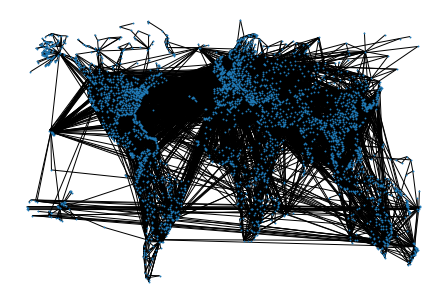

In [38]:
nx.draw(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , node_size= 3 )
plt.show()

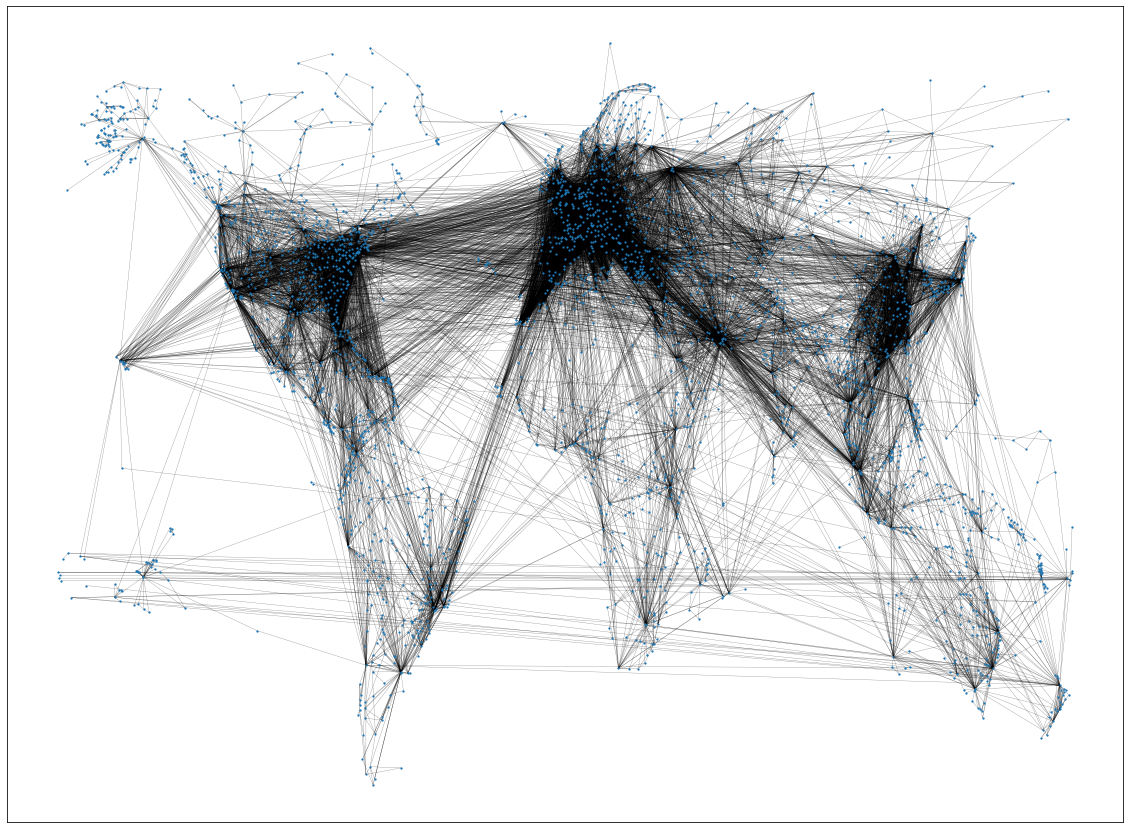

In [39]:
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , node_size = 6)
nx.draw_networkx_edges(network_main, nx.get_node_attributes(network_main, 'coordinates'), width = 0.3 , alpha = 0.5)
plt.show()

In [41]:
maximum_centrality = max(degree_centrality.values())
for airport in network_main.nodes():
    if network_main.nodes[airport]['timezone'].find('Europe') == 0 :
        network_main.nodes[airport]['color'] = 'blue'
    elif network_main.nodes[airport]['timezone'].find('Asia')== 0 :
        network_main.nodes[airport]['color'] = 'red'
    elif network_main.nodes[airport]['timezone'].find('Africa') == 0 :
        network_main.nodes[airport]['color'] = 'yellow'
    elif network_main.nodes[airport]['timezone'].find('America') == 0 :
        network_main.nodes[airport]['color'] = 'green'
    elif network_main.nodes[airport]['timezone'].find('Australia') == 0 :
        network_main.nodes[airport]['color'] = 'orange'
    elif network_main.nodes[airport]['timezone'].find('Pacific') == 0 :
        network_main.nodes[airport]['color'] = 'purple'
    else:
        network_main.nodes[airport]['color'] = 'grey'
                           
    if network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .9:
        network_main.nodes[airport]['importance'] = 400
    elif network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .5:
        network_main.nodes[airport]['importance'] = 150
    else:
        network_main.nodes[airport]['importance'] = 10

In [42]:
for route in network_main.edges():
    if (network_main[route[0]][route[1]]['airline'] == "TK"):
        network_main[route[0]][route[1]]['color'] = 'red'
        network_main[route[0]][route[1]]['size'] = 1.5
    elif (network_main[route[0]][route[1]]['airline'] == "US"):
        network_main[route[0]][route[1]]['color'] = 'blue'
        network_main[route[0]][route[1]]['size'] = 1.5
    else:
        network_main[route[0]][route[1]]['color'] = 'grey'
        network_main[route[0]][route[1]]['size'] = 0.2

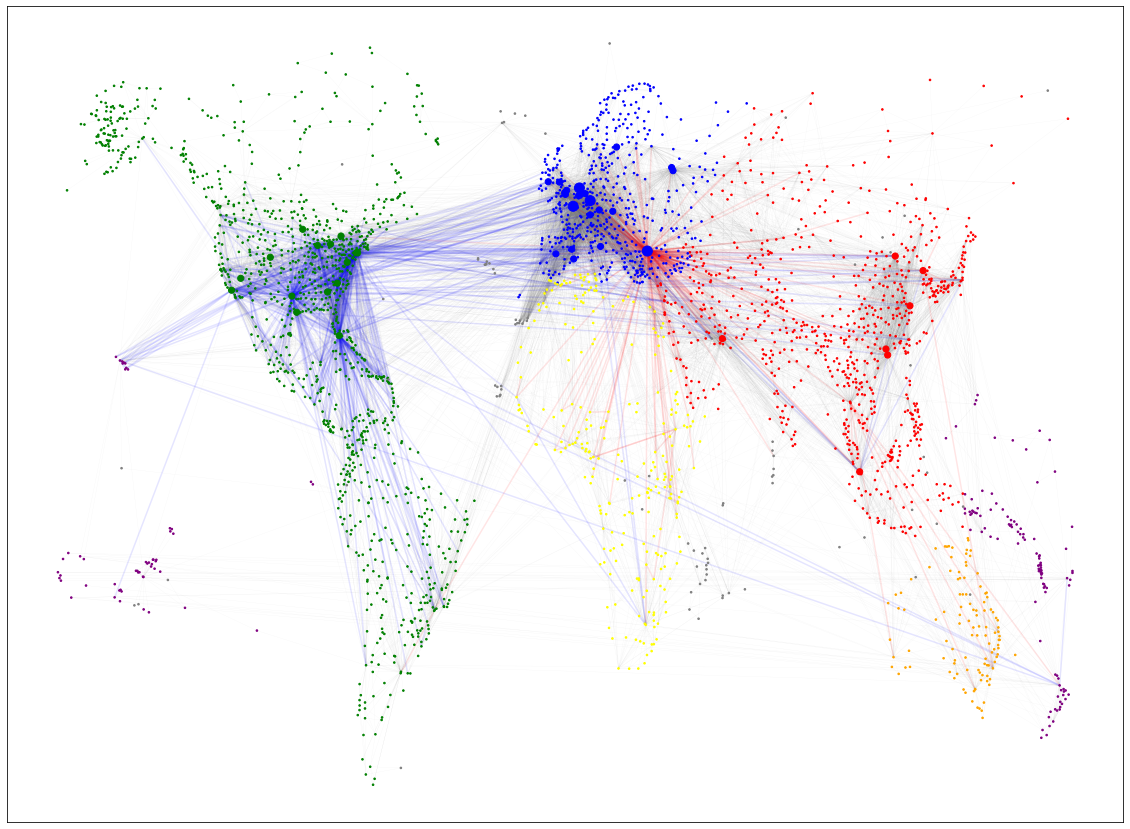

In [43]:
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , 
                       node_size = [importance for importance in nx.get_node_attributes(network_main, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network_main, 'color').values()])
nx.draw_networkx_edges(network_main, nx.get_node_attributes(network_main, 'coordinates'), 
                       width =[size for size in nx.get_edge_attributes(network_main, 'size').values()],
                       edge_color =[color for color in nx.get_edge_attributes(network_main, 'color').values()],
                       alpha = 0.1)

plt.show()